### Helper Methods for getting data

- The functions are described in their corresponding docstring 
- Each serving a different purpose to get or extract different types of data

In [13]:
from time import sleep
import pandas as pd
import numpy as np
import jikanpy as jikan
import json as json

jikan = jikan.Jikan()

def get_anime_data(anime_id):
    anime = jikan.anime(anime_id)
    df = pd.DataFrame.from_dict(anime)
    return df

def get_top_manga():
    top_manga = jikan.top(type="manga")
    return top_manga

def get_top_anime():
    """
    Gets the top current anime from the Jikan API / MAL Database

    Returns:
    top_anime: Dict containting the top anime from the first page (25 entries)
    """    ''''''
    top_anime = jikan.top(type="anime")
    return top_anime

def extract_top_anime_names(top_anime):
    '''
    Extracts the names of the top anime from the top anime data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime names
    '''
    df = pd.DataFrame(top_anime["data"])["title_english"]
    return df

def extract_top_manga_names(top_manga):
    '''
    Extracts the names of the top manga from the top manga data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime names
    '''
    df = pd.DataFrame(top_manga["data"])["title"]
    return df

def extract_top_manga_scoring(top_manga):
    '''
    Extracts the names of the top manga from the top manga data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime names
    '''
    df = pd.DataFrame(top_manga["data"])["score"]
    return df

def extract_top_anime_scoring(top_anime):
    '''
    Extracts the scores of the top anime from the top anime data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime scores
    '''
    df = pd.DataFrame(top_anime["data"])["score"]
    return df

def return_top_anime_top_manga_with_score(amount=10):
    '''
    Returns a DataFrame with the top anime and manga with their respective scores
    
    Parameters:
    amount: int, default 10
    
    Returns:
    df: DataFrame with top anime and manga with scores
    '''
    top_anime = get_top_anime()
    top_manga = get_top_manga()
    df = pd.DataFrame()
    top_anime_names = extract_top_anime_names(top_anime)[0:amount]
    top_anime_scores = extract_top_anime_scoring(top_anime)[0:amount]
    top_manga_names = extract_top_manga_names(top_manga)[0:amount]
    top_manga_scores = extract_top_manga_scoring(top_manga)[0:amount]
    df = pd.concat([top_anime_names, top_anime_scores, top_manga_names, top_manga_scores], axis=1)
    df.columns = ["Top Anime", "Top Anime Score", "Top Manga", "Top Manga Score"]
    return df

def get_review_texts(anime_id, num_pages=5):
    '''
    Gets the review texts for a given anime id
    
    Parameters:
    anime_id: int
    num_pages: int, default 5 pages
    
    Returns:
    df: DataFrame with review texts
    '''
    reviews_list = []
    for i in range(1, num_pages):
        review_page = jikan.anime(anime_id, extension="reviews", page=i)
        if(review_page["data"] == []):
            break  # data equals empty list if there are no more reviews
        for review in review_page["data"]:
            reviews_list.append({
                "text": review["review"],
                "score": review["score"]
            
            })
        sleep(2)
    return reviews_list

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn-v0_8-paper")

blue_color = "#1f77b4"
orange_color = "#ff7f0e"

#### Getting the top 10 Anime and Manga with score

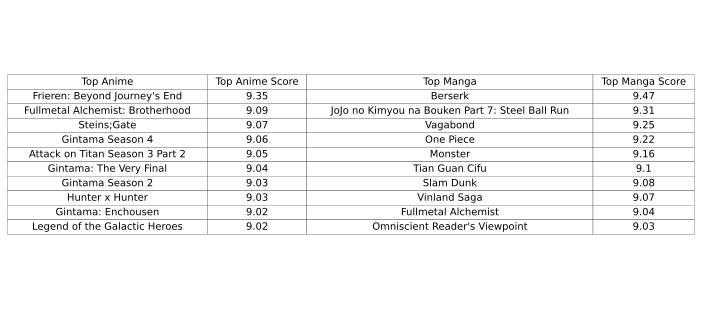

In [8]:
# https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib

# Create a new figure with a larger size
# fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# Hide axes
# ax.axis("off")

df_top_animanga = return_top_anime_top_manga_with_score(10)
# Create a table and add it to the figure
table = plt.table(
    cellText=df_top_animanga.values,
    colLabels=df_top_animanga.columns,
    cellLoc="center",
    loc="center",
)

# Auto scale the width of the columns
table.auto_set_column_width(col=list(range(len(df_top_animanga.columns))))

# Show the plot
plt.axis("off")
plt.savefig("top_scores_table.png", dpi=400)
plt.tight_layout()
plt.show()

In [2]:
df_top_animanga = return_top_anime_top_manga_with_score(10)
df_top_animanga

,Top Anime,Top Anime Score,Top Manga,Top Manga Score
0,Frieren: Beyond Journey's End,9.35,Berserk,9.47
1,Fullmetal Alchemist: Brotherhood,9.09,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.31
2,Steins;Gate,9.07,Vagabond,9.25
3,Gintama Season 4,9.06,One Piece,9.22
4,Attack on Titan Season 3 Part 2,9.05,Monster,9.16
5,Gintama: The Very Final,9.04,Tian Guan Cifu,9.10
6,Gintama Season 2,9.03,Slam Dunk,9.08
7,Hunter x Hunter,9.03,Vinland Saga,9.07
8,Gintama: Enchousen,9.02,Fullmetal Alchemist,9.04
9,Legend of the Galactic Heroes,9.02,Omniscient Reader's Viewpoint,9.03


In [3]:
anime = get_top_anime()
manga = get_top_manga()
df =  pd.DataFrame(anime["data"])["title_english"]
df = pd.DataFrame(df[0:10], columns=["title_english"])
df["Scores"] = pd.DataFrame(anime["data"])["score"]
df.rename(columns={"title_english": "Anime"}, inplace=True)
print("Top 10 Anime")
print(df)

count_Gintama = pd.DataFrame(anime["data"])["title_english"].str.contains("Gintama").sum()
count_top_anime = pd.DataFrame(anime["data"])["title_english"].count()
print("Amount of Gintama in the top anime list: " + str(count_Gintama) + " with a total of " + str(count_top_anime) + " anime in the list.")



Top 10 Anime
                              Anime  Scores
0     Frieren: Beyond Journey's End    9.36
1  Fullmetal Alchemist: Brotherhood    9.09
2                       Steins;Gate    9.07
3                  Gintama Season 4    9.06
4   Attack on Titan Season 3 Part 2    9.05
5           Gintama: The Very Final    9.04
6                  Gintama Season 2    9.03
7                   Hunter x Hunter    9.03
8                Gintama: Enchousen    9.02
9     Legend of the Galactic Heroes    9.02
Amount of Gintama in the top anime list: 8 with a total of 25 anime in the list.


In [15]:
seasons = jikan.seasons(extension="now")
seasons

dataframe = pd.DataFrame(seasons["data"])
dataframe["title_english"]

0                                 [Oshi No Ko] Season 2
1                                 Tower of God Season 2
2          Alya Sometimes Hides Her Feelings in Russian
3                           Fairy Tail: 100 Years Quest
4                                  Suicide Squad Isekai
5                               Days with My Stepsister
6     Our Last Crusade or the Rise of a New World Se...
7                                My Deer Friend Nokotan
8                                My Deer Friend Nokotan
9                        NieR:Automata Ver1.1a (Cour 2)
10            My Hero Academia The Movie 4: You're Next
11                   No Longer Allowed In Another World
12              Kimi ni Todoke: From Me to You Season 3
13                                         Pseudo Harem
14    The Strongest Magician in the Demon Lord's Arm...
15                            2.5 Dimensional Seduction
16              Monogatari Series: Off & Monster Season
17              Monogatari Series: Off & Monster

In [47]:
df = get_review_texts(5114)
df
# mal_ids = df["data"][0]["mal_id"]
# mal_ids

0     First of all, I have seen the original FMA and...
1     Fullmetal Alchemist: Brotherhood gets an immen...
2     Adaptations have long been a thorn in the side...
3     Since I couldn't find any legitimate objective...
4     *Spoiler Warning Aside from the usual everyday...
5     I can't even watch the original FMA anime now ...
6     Now, this is a prime example of how to adapt a...
7     "We're not gods, we're only human. We can't ev...
8     If one wishes to obtain something, something o...
9     Full metal alchemist brotherhood the anime tha...
10    One of my favorite anime of all time! I was on...
11    I have followed both the anime and manga of FM...
12    Ah, Fullmetal Alchemist, what an amazing ride ...
13    I was dreading having to make my way through B...
14    I'm going to be completely honest here... this...
15    There isn't much more I could say with all the...
16    This anime is going in the All Time Favourites...
17    Story: Well this story is nothing short of

In [68]:
from time import sleep


# review = jikan.anime(5114, extension="reviews", page=500)
# if(review["data"] == []):
#     print("No reviews")

df = pd.DataFrame()

for i in range(1, 3):
    review = jikan.anime(5114, extension="reviews", page=i)
    if(review["data"] == []):
        break 
    else:
        sleep(1)
    new_data = pd.DataFrame.from_dict(review["data"])["review"]
    df = pd.concat([df, new_data], ignore_index=True)

df

,0
0,"First of all, I have seen the original FMA and..."
1,Fullmetal Alchemist: Brotherhood gets an immen...
2,Adaptations have long been a thorn in the side...
3,Since I couldn't find any legitimate objective...
4,*Spoiler Warning Aside from the usual everyday...
5,I can't even watch the original FMA anime now ...
6,"Now, this is a prime example of how to adapt a..."
7,"""We're not gods, we're only human. We can't ev..."
8,"If one wishes to obtain something, something o..."
9,Full metal alchemist brotherhood the anime tha...


In [76]:
df = get_review_texts(5114, 3)
df

,0
0,"First of all, I have seen the original FMA and..."
1,Fullmetal Alchemist: Brotherhood gets an immen...
2,Adaptations have long been a thorn in the side...
3,Since I couldn't find any legitimate objective...
4,*Spoiler Warning Aside from the usual everyday...
5,I can't even watch the original FMA anime now ...
6,"Now, this is a prime example of how to adapt a..."
7,"""We're not gods, we're only human. We can't ev..."
8,"If one wishes to obtain something, something o..."
9,Full metal alchemist brotherhood the anime tha...


In [78]:
top_anime = get_top_anime()
top_anime_names = extract_top_anime_names(top_anime)
top_anime_names

0                         Frieren: Beyond Journey's End
1                      Fullmetal Alchemist: Brotherhood
2                                           Steins;Gate
3                                      Gintama Season 4
4                       Attack on Titan Season 3 Part 2
5                               Gintama: The Very Final
6                                      Gintama Season 2
7                                       Hunter x Hunter
8                                    Gintama: Enchousen
9                         Legend of the Galactic Heroes
10            Kaguya-sama: Love is War - Ultra Romantic
11                      Bleach: Thousand-Year Blood War
12                                     Gintama Season 5
13                      Fruits Basket: The Final Season
14                                              Gintama
15                                 Clannad: After Story
16                                       A Silent Voice
17                March Comes In Like a Lion 2nd

In [39]:
s = jikan.manga(1706)
s["data"]["titles"]

[{'type': 'Default',
  'title': 'JoJo no Kimyou na Bouken Part 7: Steel Ball Run'},
 {'type': 'Synonym',
  'title': "JoJo's Bizarre Adventure Part 7: Steel Ball Run"},
 {'type': 'Synonym', 'title': 'SBR'},
 {'type': 'Japanese', 'title': 'ジョジョの奇妙な冒険 Part7 STEEL BALL RUN'},
 {'type': 'French', 'title': 'Steel Ball Run'}]

In [6]:
count = 0
for i in range(0, len(df)):
    if df[i] is not None and "gintama" in df[i].lower():
        count += 1
    else:
        continue
print(count)

KeyError: 0

In [15]:
df = pd.DataFrame(jikan.top(type="anime", parameters={"filter": "bypopularity"})["data"][0:10])
df["title"]

0                  Shingeki no Kyojin
1                          Death Note
2    Fullmetal Alchemist: Brotherhood
3                       One Punch Man
4                    Sword Art Online
5                    Kimetsu no Yaiba
6               Boku no Hero Academia
7                              Naruto
8              Hunter x Hunter (2011)
9                         Tokyo Ghoul
Name: title, dtype: object

In [53]:
s = jikan.top(type="anime")["data"]
sd = pd.DataFrame(s)
d = sd["demographics"]
list = []
for i in range(0, len(d)-1):
    for item in d[i]:
        list.append(item['name'])

df = pd.DataFrame(list)

        
        

0    19
dtype: int64

['Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Seinen', 'Shounen', 'Shounen', 'Shoujo', 'Shounen', 'Shounen', 'Seinen', 'Shounen', 'Shounen', 'Shounen', 'Seinen']


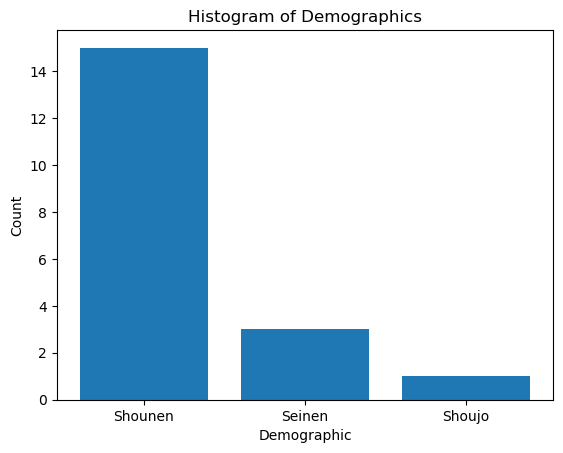

In [63]:
import matplotlib.pyplot as plt
from collections import Counter

s = jikan.top(type="anime")["data"]
sd = pd.DataFrame(s)
d = sd["demographics"]
l = [x["name"] for dicts in d for x in dicts]
# for i in range(0, len(d) - 1):
#     for item in d[i]:
#         list.append(item["name"])

print(l)
counts = Counter(l)

# Create a DataFrame from the counts
df = pd.DataFrame.from_dict(counts, orient="index").reset_index()
df = df.rename(columns={"index": "demographic", 0: "count"})

# Plot the histogram
plt.bar(df["demographic"], df["count"])
plt.xlabel("Demographic")
plt.ylabel("Count")
plt.title("Histogram of Demographics")
plt.show()

In [81]:
def get_top_popular_demographics():
    num_pages = 3
    demographic_names_popular = []
    demographic_names_top = []
    for i in range(1, num_pages):
        top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
        sleep(2)  # to prevent rate limiting
        popular_anime = pd.DataFrame(jikan.top(type="anime", parameters={"filter": "bypopularity"}, page=i)["data"])
        
        top_anime_demographics = top_anime["demographics"]  # getting demographics dicts, which are in a list
        popular_anime_demographics = popular_anime["demographics"]
        
        demographic_names_top = demographic_names_top + [x["name"] for item in top_anime_demographics for x in item]  # extracting list item, then extracting name from dict
        demographic_names_popular = demographic_names_popular + [x["name"] for item in popular_anime_demographics for x in item]
        
    return Counter(demographic_names_top), Counter(demographic_names_popular)

In [82]:
d, s = get_top_popular_demographics()

In [85]:
print(d)
print(s)

Counter({'Shounen': 24, 'Seinen': 9, 'Shoujo': 1})
Counter({'Shounen': 28, 'Seinen': 5})


In [21]:
from collections import Counter

fmb = get_anime_data(5114)
gs = pd.DataFrame(fmb["data"]["genres"])
c = Counter(gs["name"])
c

Counter({'Action': 1, 'Adventure': 1, 'Drama': 1, 'Fantasy': 1})

In [22]:
def get_top_popular_genres():
    num_pages = 10
    genre_names_popular = []
    genre_names_top = []
    for i in range(1, num_pages):
        top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
        sleep(2)  # to prevent rate limiting
        popular_anime = pd.DataFrame(
            jikan.top(type="anime", parameters={"filter": "bypopularity"}, page=i)[
                "data"
            ]
        )

        top_anime_genres = top_anime[
            "genres"
        ]  # getting genres dicts, which are in a list
        popular_anime_genres = popular_anime["genres"]

        genre_names_top = genre_names_top + [
            x["name"] for item in top_anime_genres for x in item
        ]  # extracting list item, then extracting name from dict
        genre_names_popular = genre_names_popular + [
            x["name"] for item in popular_anime_genres for x in item
        ]
    return Counter(genre_names_top)

In [23]:
ss = get_top_popular_genres()

In [24]:
ss

Counter({'Action': 99,
         'Drama': 87,
         'Fantasy': 59,
         'Comedy': 52,
         'Supernatural': 52,
         'Adventure': 51,
         'Mystery': 41,
         'Sci-Fi': 40,
         'Suspense': 32,
         'Award Winning': 26,
         'Romance': 23,
         'Slice of Life': 19,
         'Sports': 18,
         'Ecchi': 3,
         'Horror': 3,
         'Avant Garde': 2,
         'Gourmet': 1})

In [26]:
top_anime = pd.DataFrame(jikan.top(type="anime", page=1)["data"])

In [27]:
top_anime["genres"]

0     [{'mal_id': 2, 'type': 'anime', 'name': 'Adven...
1     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
2     [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
3     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
4     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
5     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
6     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
7     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
8     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
9     [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
10    [{'mal_id': 4, 'type': 'anime', 'name': 'Comed...
11    [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
12    [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
13    [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
14    [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
15    [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
16    [{'mal_id': 46, 'type': 'anime', 'name': 'Awar...
17    [{'mal_id': 8, 'type': 'anime', 'name': 'D

In [28]:
genre_names_top = []
genre_names_top = genre_names_top + [
    x["name"] for item in top_anime["genres"] for x in item
]

In [29]:
genre_names_top

['Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Drama',
 'Sci-Fi',
 'Suspense',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Action',
 'Drama',
 'Suspense',
 'Action',
 'Comedy',
 'Drama',
 'Sci-Fi',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'Romance',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Supernatural',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Supernatural',
 'Award Winning',
 'Drama',
 'Drama',
 'Action',
 'Award Winning',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Action',
 'Drama',
 'Suspense',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Suspense',
 'Comedy',
 'Mystery',
 'Supernatural']

In [3]:
top50 = pd.DataFrame()
for i in range(1, 3):
    top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
    sleep(2)  # to prevent rate limiting
    top50 = pd.concat([top50, top_anime], ignore_index=True)

NameError: name 'pd' is not defined

In [29]:
fmab = jikan.anime(5114, extension="relations")
fmab = pd.DataFrame(fmab["data"])
index = fmab.loc[fmab["relation"] == "Adaptation"].index[0]
entry = fmab["entry"][index]
manga_id = entry[0]["mal_id"]
manga_id

25

In [36]:
def helpfunc():
    top_anime = pd.DataFrame(jikan.top(type="anime")["data"])[0:10]
    top_anime_scorings = top_anime["score"].tolist()
    mal_ids = top_anime["mal_id"]
    manga_scorings = []
    for i in range (0, len(mal_ids)):
        current = jikan.anime(mal_ids[i], extension="relations")
        current = pd.DataFrame(current["data"])
        index = current.loc[current["relation"] == "Adaptation"].index[0]
        entry = current["entry"][index]
        manga_id = entry[0]["mal_id"]
        manga = jikan.manga(manga_id)
        sleep(2)
        manga_scorings.append(manga["data"]["score"])
    return top_anime_scorings, manga_scorings

s, d = helpfunc()
print("Anime" + str(s))
print("Manga" + str(d))

Anime[9.35, 9.09, 9.07, 9.06, 9.05, 9.04, 9.03, 9.03, 9.02, 9.02]
Manga[8.79, 9.04, 8.05, 8.63, 8.55, 8.63, 8.63, 8.74, 8.63, 8.6]


In [5]:
def helpfunc2():
    top_manga = pd.DataFrame(jikan.top(type="manga")["data"])[0:10]
    sleep(2)
    top_manga_scorings = top_manga["score"].tolist()
    mal_ids = top_manga["mal_id"]
    anime_scorings = []
    for i in range (0, len(mal_ids)):
        sleep(2)
        current = jikan.manga(mal_ids[i], extension="relations")
        current = current["data"]
        if current == []:
            anime_scorings.append(np.nan)
            continue
        current = pd.DataFrame(current)
        index = current.loc[current["relation"] == "Adaptation"].index
        if index.empty:
            anime_scorings.append(np.nan)
            continue
        entry = current["entry"][index[0]]
        anime_id = entry[0]["mal_id"]
        anime = jikan.anime(anime_id)
        anime_scorings.append(anime["data"]["score"])
    return top_manga_scorings, anime_scorings

s, d = helpfunc2()
print("Manga" + str(s))
print("Anime" + str(d))

Manga[9.47, 9.31, 9.25, 9.22, 9.16, 9.1, 9.08, 9.07, 9.04, 9.03]
Anime[8.59, nan, nan, 8.72, 8.88, 8.42, 8.54, 8.75, 8.11, nan]


In [46]:
top_manga = pd.DataFrame(jikan.top(type="manga")["data"])[0:10]
mal_ids = top_manga["mal_id"]
mal_ids

0         2
1      1706
2       656
3        13
4         1
5    130826
6        51
7       642
8        25
9    143441
Name: mal_id, dtype: int64

In [69]:
current = pd.DataFrame(jikan.manga(2, extension="relations")["data"])
index = current.loc[current["relation"] == "Adaptation"].index
current["entry"][index[0]][0]["mal_id"]
score = jikan.anime(current["entry"][index[0]][0]["mal_id"])["data"]["score"]
score

8.59

In [71]:
s = []
s == []

True

In [3]:
current = jikan.manga(656, extension="relations")
current = pd.DataFrame(current["data"])
current.empty

True

In [6]:
reviews = get_review_texts(5114, 3)

40

In [24]:
len(reviews)
for i, string in enumerate(reviews):
    print(i, string)
reviews[0][2]

0 0


'Adaptations have long been a thorn in the side of anime viewers, but not because they are inherently bad. No, the main problem has been that many studios have regarded the original work almost as an afterthought, and there are a number of shows that could have been wonderful if the writers had simply stuck to the original story. One of the issues at hand seems to be ownership as producers, writers and directors all seem to want the work to be reflective of their style and perception, and in order to stamp their mark on a show they will makes numerous unnecessary changes or additions.Admittedly there are times when the adaptation supersedes the original work, but more often than not the result is at best a decent anime, and at worst utter twaddle.\n\nAnd then there\'s the other side of the coin, where the anime adaptation sticks to the storyline set out in the original work. Normally one would expect these to be superior works, but in a strange irony this is not always the case. The pr

In [30]:
from more_itertools import substrings
import torch
from collections import Counter

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Get the current CUDA device ID
    device_id = torch.cuda.current_device()
    # Get the name of the current device
    device_name = torch.cuda.get_device_name(device_id)
    print(f"Using GPU: {device_name} (ID: {device_id})")
else:
    device_id = -1  # -1 typically refers to the CPU
    print("CUDA is not available. Using CPU instead.")

# Now, you can use the device_id with the transformers pipeline
from transformers import pipeline

sentiment_analysis = pipeline(
    "sentiment-analysis",
    model="siebert/sentiment-roberta-large-english",
    device=device_id,
)
counts = []
for i in range(0, len(reviews[0])):
    result = sentiment_analysis(reviews[0][i][0:513])
    counts.append(result[0]["label"])
Counter(counts)

Using GPU: NVIDIA GeForce RTX 4070 (ID: 0)


Counter({'POSITIVE': 37, 'NEGATIVE': 3})

In [1]:
import torch
torch.cuda.is_available()

True

In [23]:
def get_review_textsTEST(anime_id, num_pages=5):
    """
    Gets the review texts for a given anime id

    Parameters:
    anime_id: int
    num_pages: int, default 5 pages

    Returns:
    df: DataFrame with review texts
    """
    reviews_list = []
    for i in range(1, num_pages + 1):
        review_page = jikan.anime(anime_id, extension="reviews", page=i)
        if review_page["data"] == []:
            break  # data equals empty list if there are no more reviews
        for review in review_page["data"]:
            reviews_list.append({"text": review["review"], "score": review["score"]})
        sleep(2)
    return pd.DataFrame.from_dict(reviews_list)

In [24]:
fmabreview = get_review_textsTEST(5114, 1)
fmabreview

,text,score
0,"First of all, I have seen the original FMA and...",10
1,Fullmetal Alchemist: Brotherhood gets an immen...,7
2,Adaptations have long been a thorn in the side...,9
3,Since I couldn't find any legitimate objective...,5
4,*Spoiler Warning Aside from the usual everyday...,3
5,I can't even watch the original FMA anime now ...,10
6,"Now, this is a prime example of how to adapt a...",9
7,"""We're not gods, we're only human. We can't ev...",10
8,"If one wishes to obtain something, something o...",10
9,Full metal alchemist brotherhood the anime tha...,4


In [ ]:
reviews_list = []
for i in range(1, num_pages):
    review_page = jikan.anime(anime_id, extension="reviews", page=i)
    if review_page["data"] == []:
        break  # data equals empty list if there are no more reviews
    for review in review_page["data"]:
        reviews_list.append({"text": review["review"], "score": review["score"]})
    sleep(2)